In [2]:
import sympy as sy
import numpy as np
from IPython.display import display, Image, Math
from math import radians, degrees

Projete um rachador de troncos de madeira que seja seguro e que possua as seguintes características:
- Que possa ser guinchado a velocidades de rodovia atrás de uma caminhonete grande
- Um motor a gasolina de 8 HP
- Que acomode troncos de madeira de 2ft de comprimento
- Que gere 15 toneladas de força de corte
- Que tenha uma gaiola de segurança que cubra a área do tronco durante a divisão para prevenir ferimentos no operador.

<hr>

# Obtendo a potência de projeto

Fator de serviço - $K_0$

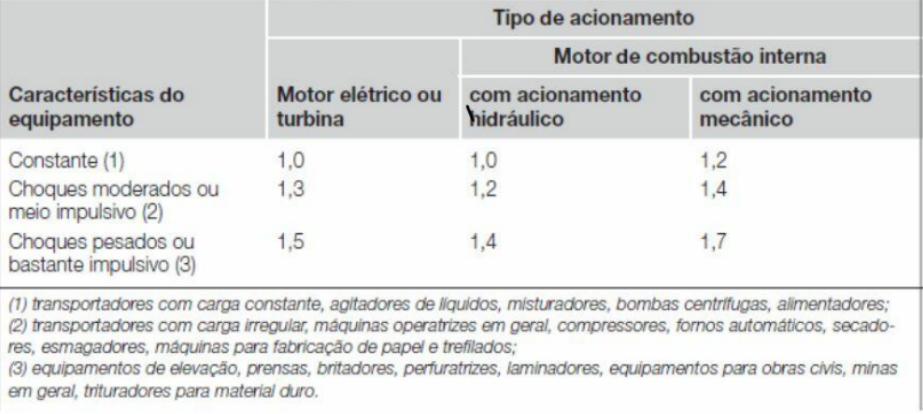

In [3]:
Image('fator_de_serviço.png')

In [4]:
Ko = 1.7

In [5]:
# Unidades
pol,m,HP,W,RPM,s = sy.symbols('pol,m,HP,W,RPM,s')
conv = {pol:0.0254*m, HP:7368*W,RPM:1/(60*s)}

In [6]:
# Dados
No = 8*HP     # Potência nominal
n1 = 3600*RPM # Rotação do eixo motor
n2 = (n1/5)   # Rotação do eixo movido
a = 20*pol    # Distância entre centros
print("Sendo 1:5, tem-se:")
display(Math(f"n_1 = {sy.latex(n1)}"))
display(Math(f"n_2 = {sy.latex(n2)}"))

Sendo 1:5, tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

A rotação $n_2$ está acima do que se procura no projeto, uma vez que buscamos maior torque e menor RPM, pois o projeto necessita de ambos. Uma rotação muito alta inviabilizaria a operação. Foi necessário realizar mais reduções, adicionando outras polias ao sistema.  

In [7]:
n3 = n2/5
n4 = n3/5
display(Math(f"n_3 = {sy.latex(n3)}"))
display(Math(f"n_4 = {sy.latex(n4.evalf())}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
Pp = Ko*No
display((f'Potência de projeto = {(sy.latex(Pp))}'))

'Potência de projeto = 13.6 HP'

# Definição do perfil da correia

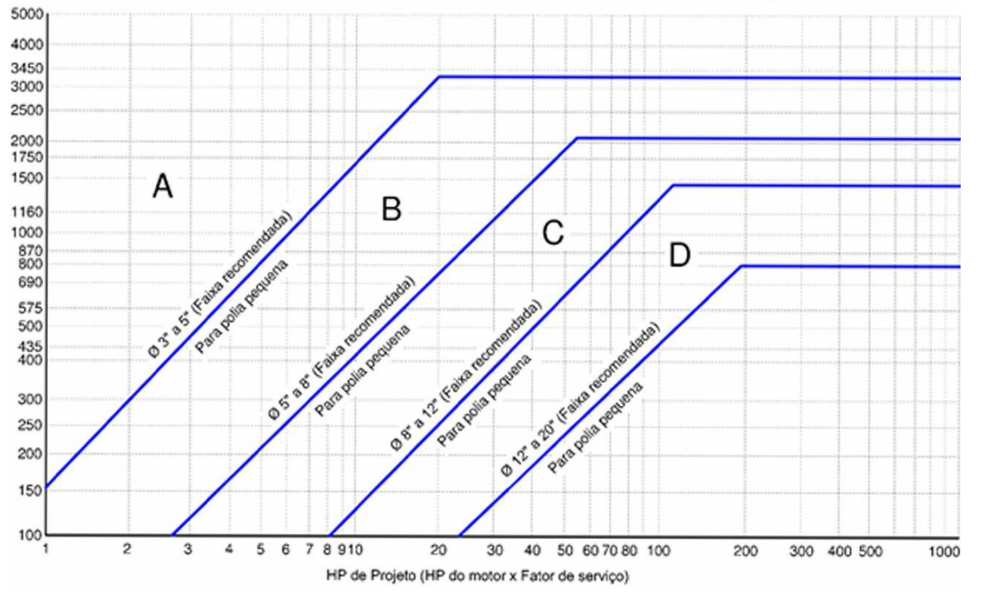

In [9]:
Image('grafico.png')

Escolheu-se o perfil A, $3" \le ø \le 8"$

# Definição dos diâmetros das polias

In [10]:
dp1=3*pol
i=n1/n2 # razão de transmissão
dp2=dp1*i
print('Primeiro Estágio:')
print((f"razão de transmissão (i) = {i}"))
display(Math(f"dp_1 = {sy.latex(dp1)}"))
display(Math(f"dp_2 = {sy.latex(dp2)}"))

Primeiro Estágio:
razão de transmissão (i) = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como foi definido que precisa-se de 4 reduções para chegar a rotação desejada, fez-se um sistema de polias com 4 estágios, e cada estágio é idêntico ao anterior, com mesmo diâmetro de polia motora e polia movida. Isso é possível adicionando polias motoras ao mesmo eixo das polias movidas.

In [11]:
dp3 = dp1
dp4 = dp2
print('Segundo Estágio:')
print((f"razão de transmissão (i) = {i}"))
display(Math(f"dp_3 = {sy.latex(dp3)}"))
display(Math(f"dp_4 = {sy.latex(dp4)}"))

Segundo Estágio:
razão de transmissão (i) = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
dp5 = dp1
dp6 = dp2
print('Terceiro Estágio:')
print((f"razão de transmissão (i) = {i}"))
display(Math(f"dp_5 = {sy.latex(dp5)}"))
display(Math(f"dp_6 = {sy.latex(dp6)}"))

Terceiro Estágio:
razão de transmissão (i) = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [13]:
dp7 = dp1
dp8 = dp2
print('Quarto Estágio:')
print((f"razão de transmissão (i) = {i}"))
display(Math(f"dp_7 = {sy.latex(dp7)}"))
display(Math(f"dp_8 = {sy.latex(dp8)}"))

Quarto Estágio:
razão de transmissão (i) = 5


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Definição da velocidade tangencial da correia

In [14]:
v = (sy.pi*dp1*n1).subs(conv)
display(Math(f'V_t = {sy.latex(v.evalf(4))}'))

<IPython.core.display.Math object>

# Definição do comprimento da correia e do ângulo de abraçamento da polia

In [15]:
L = 2*a+1.57*(dp2+dp1)+(dp2-dp1)**2/(4*a)
display(Math(f'L = {sy.latex(L)}'))

<IPython.core.display.Math object>

In [16]:
theta = sy.pi - 2*sy.asin((dp2-dp1)/(2*a))
display(Math(f'\\theta = {theta.evalf(3)} rad'))

<IPython.core.display.Math object>

# Definição do comprimento padronizado da correia e criação da distância entre centros.

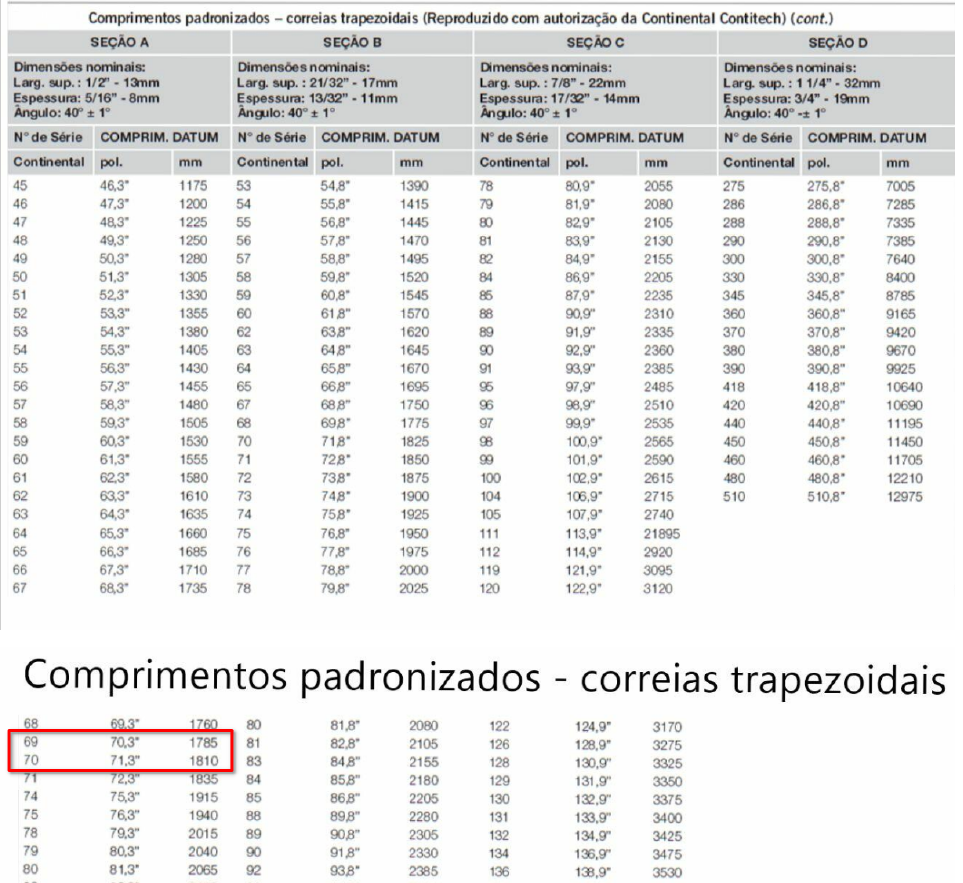

In [17]:
Image('comprimentos_padronizados.png')

In [18]:
L_tab = 70.3*pol
display(Math('L_{tab} = %s'%sy.latex(L_tab)))

<IPython.core.display.Math object>

In [19]:
# TODO: Conferir a fórmula
a_corr = a - (L - L_tab)/2 # distância entre centros corrigida
display(Math('a_{corrigido} = %s'%sy.latex(a_corr)))

<IPython.core.display.Math object>

# Determinação dos fatores de correção

In [20]:
display(Math(f'\\theta = {round((degrees(theta)),2)}°'))

<IPython.core.display.Math object>

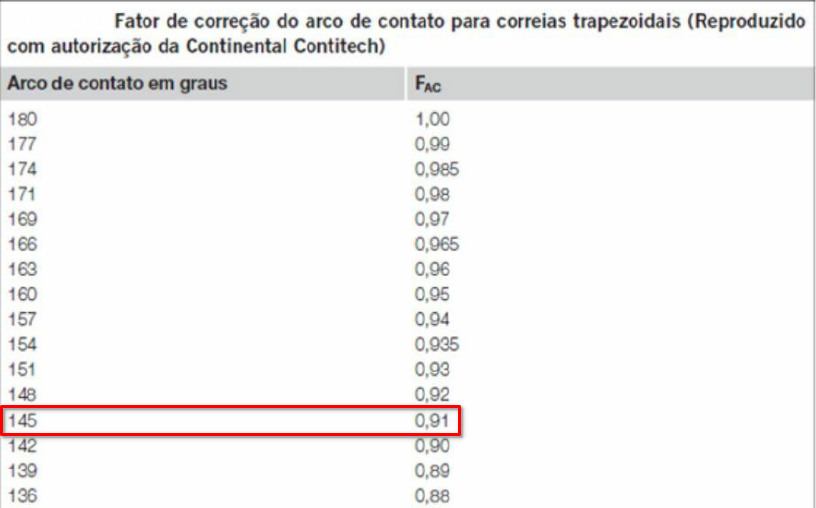

In [21]:
Image('fator_arco.png')

In [22]:
F_AC = 0.91

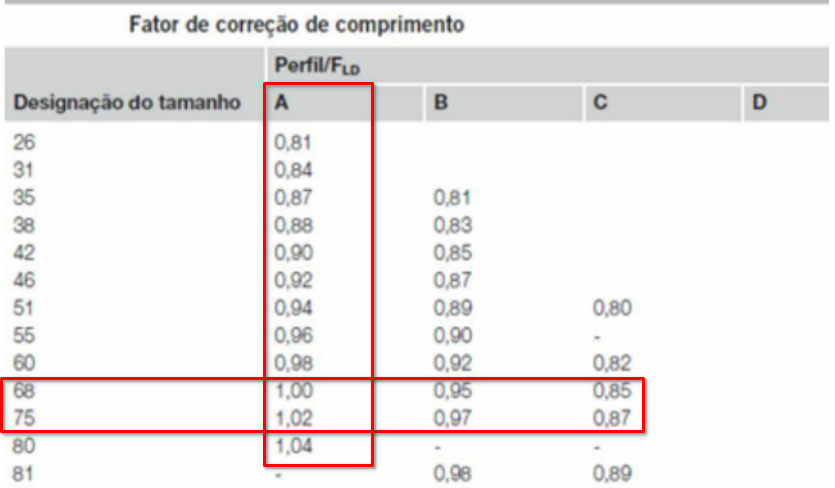

In [23]:
Image('fator_compr.png')

In [24]:
# Interpolação
F_LP = 1.00 + (70.3 - 68) * ((1.02-1.00) / (75-68))
display(Math('F_{LP} = %s'%F_LP))

<IPython.core.display.Math object>

In [25]:
# TODO: Tudo abaixo está sem fazer. Tabela de HP por correia - perfil A não tem 3600 RPM

# Determinação do HP básico e do HP adicional por correia

In [26]:
n1

3600*RPM

In [27]:
# tabela HP por correia
HP_bas=(14.44-13.67)/(1200-1100)*(1170-1100)+13.67
HP_bas

14.209

In [28]:
HP_adic=(2.10-1.92)/(1200-1100)*(1170-1100)+1.92
HP_adic

2.0460000000000003

In [29]:
HP_class=(HP_bas+HP_adic)*HP
HP_class

16.255*HP

# Determinação do HP efetivo e do número de correias

In [30]:
HP_efet=HP_class*F_AC*F_LP
HP_efet

14.8892549*HP

In [31]:
No_de_correias=Pp/HP_efet
No_de_correias

0.913410381603447

In [32]:
No_de_correias=int(No_de_correias)+1
No_de_correias

1